In [35]:
import matplotlib.pyplot as plt
import numpy as np

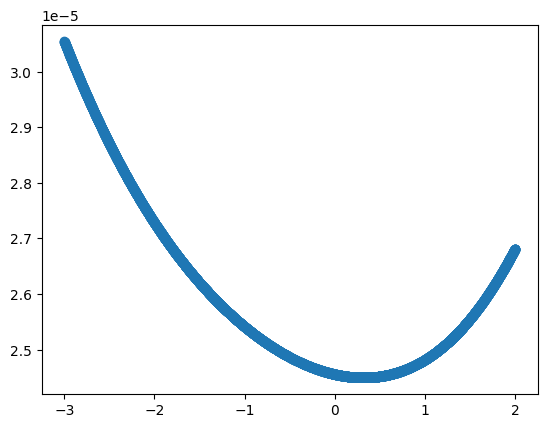

In [36]:
#Ejercicio 7 (Raíces de Polinomios)
#b) Cualitativamente parece que el mínimo es en x=0.30, t=2.43
def TiempoViaje(x):
    return (((x+3)**2 + 4)**(1/2) + 1.33*((x-2)**2 + 4)**(1/2))/300000

#En la función de arriba se pusieron los valores de posición directamente en la formula
#Por si algo, +3=-T[0], 4=T[1]^2, 2=-R[0]^2, 4=R[1]^2

X = np.linspace(-3,2,5000)
t = TiempoViaje(X)
plt.scatter(X,t)



In [37]:
#c)
def DerivadaCentral(f,x,h=1e-5):
    return (f(x+h)-f(x-h))/(2*h)
def SegundaDerivadaCentral(f,x,h=1e-5):
    return (f(x+h) - 2*f(x) + f(x-h))/(h**2)

def NewtonRaphsonC(f, xn, i_max = 1000, tolerancia=1e-9):
    error = 1
    i = 0
    xn1 = xn
    while error > tolerancia and i < i_max:
        try:
            xn1 = xn - DerivadaCentral(f,xn)/SegundaDerivadaCentral(f,xn)
            error = np.abs(DerivadaCentral(f,xn)/SegundaDerivadaCentral(f,xn))
        except ZeroDivisionError:
            pass
        xn = xn1
        i += 1
    if i == i_max:
        return False
    else:
        return xn
    
def GetAllRootsC(f, x, tolerancia = 6):
    Roots = np.array([])
    for i in x:
        possible_root = NewtonRaphsonC(f,i)

        if possible_root != False:
            root = round(possible_root, tolerancia)
            if root not in Roots:
                Roots = np.append(Roots, root)

    Roots.sort()
    return Roots

PuntoCritico = GetAllRootsC(TiempoViaje,X)
PuntoCritico = float(PuntoCritico[0])
TiempoMinimo = TiempoViaje(PuntoCritico)
print(f"El tiempo mínimo es {TiempoMinimo} segundos")

El tiempo mínimo es 2.449931892295416e-05 segundos


In [38]:
#d) Aquí se pasó la respuesta a grados respecto al EJE Y POSITIVO para que pudiera ser leido mejor.
tan_alpha0 = -(PuntoCritico+3)/2
alpha0 = np.arctan(tan_alpha0)
tan_alpha1 = -(2-PuntoCritico)/2
alpha1 = np.arctan(tan_alpha1)
alpha0_grados =round(float(np.degrees(alpha0)),2)
alpha1_grados =round(float(np.degrees(alpha1)),2)
print(f"Respecto al eje y POSITIVO, el angulo de incidencia es {360+alpha0_grados} grados, y el de refracción es {180+alpha1_grados} grados.")

Respecto al eje y POSITIVO, el angulo de incidencia es 301.09000000000003 grados, y el de refracción es 139.92000000000002 grados.


In [39]:
#e.
1/1.33, float(np.sin(alpha1)/np.sin(alpha0))
#Si se cumple la ley de Snell porque ambos cocientes son iguales hasta 7 decimales

(0.7518796992481203, 0.7518796210675457)